# SciPy

SciPy is a collection of software for scientific computing. It includes NumPy and matplotlib from the previous two lessons, for example.

The SciPy library also includes functions to do numerical integration, interpolation, Fourier transforms, statistics, special mathematical functions, and more.

### Integration


* $\int_0^5 dx (x^2 + 3)$

* We will use Gaussian quadrature  https://en.wikipedia.org/wiki/Gaussian_quadrature 

* exact answer is $5^3 / 3 + 3\times5 $

In [1]:
5.**3 / 3 + 3 * 5.

56.666666666666664

We can use SciPy to numerically integrate the function $(x^2 + 3)$.

In [2]:
from scipy import integrate
import numpy as np

# define the function to integrate
def myf(x):
    return x**2 + 3

# pass in function, integration limits, and quality of answer
# returns answer and estimate of the error
I, err = integrate.quad(myf, 0, 5, epsabs = 1.e-14)

print I, err

56.6666666667 6.29126380621e-13


In [3]:
integrate.quad?


### Integration of a pre-sampled function

In astrophysics this happens a lot -- someone hands you some pre-sampled points, and you have to calculate the area under the curve.

Recall Simpson's rule -- https://en.wikipedia.org/wiki/Gaussian_quadrature


In [4]:
N = 20


x = np.linspace(0, 2 * np.pi, N)
print(x)

[ 0.          0.33069396  0.66138793  0.99208189  1.32277585  1.65346982
  1.98416378  2.31485774  2.64555171  2.97624567  3.30693964  3.6376336
  3.96832756  4.29902153  4.62971549  4.96040945  5.29110342  5.62179738
  5.95249134  6.28318531]


In [5]:
y = np.cos(x)**2

Populating the interactive namespace from numpy and matplotlib


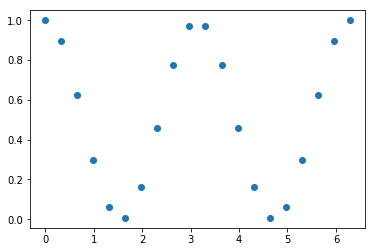

In [6]:
%pylab inline

plot(x, y, 'o')


In [7]:
val = integrate.simps(y,x)

In [8]:
print "value is", val, "fractional error is" , np.abs(val - np.pi) / np.pi

value is 3.13578182353 fractional error is 0.00184964465442


Not bad -- 0.2% accuracy based on so few points.

### Interpolation

Say you have some data that is sampling your function and you want to interpolate the value of your function between your data points. 

* Example function (from which coarse data are drawn):  $f(x) = (e^{-x})  \sin(2  \pi  x)$

In [9]:
def myf(x):
    return (exp(-x)) * sin(2 * numpy.pi * x)

Let's sample our function only at 8 points, but we want to interpolate between those points to sample our function at 50 different points.

In [10]:
x_coarse = linspace(0, 2, num = 8)
x_fine = linspace(0, 2, num = 50)

Now let's try different interpolation techniques. First, we will use a basic interpolation method, and then we will interpolate using a spline (see http://mathworld.wolfram.com/CubicSpline.html for information about cubic splines).

In [11]:
from scipy import interpolate

myInterpFunc = interpolate.interp1d(x_coarse, myf(x_coarse))
y_coarse = myInterpFunc(x_coarse)

myInterpFuncSpline = interpolate.CubicSpline(x_coarse, myf(x_coarse))
y_coarseSpline = myInterpFuncSpline(x_coarse)

Here's our coarse points and how they compare to the original function.

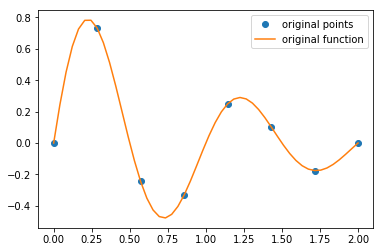

In [12]:
plot(x_coarse, y_coarse, 'o', label = 'original points')
plot(x_fine, myf(x_fine), label = 'original function')
legend()

And here are the results of our interpolations.

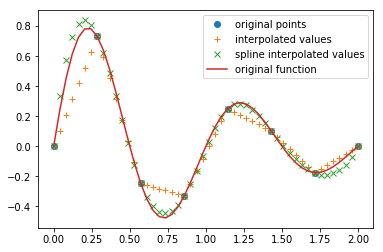

In [13]:
plot(x_coarse, y_coarse, 'o', label = 'original points')
plot(x_fine, myInterpFunc(x_fine), '+', label = 'interpolated values')
plot(x_fine, myInterpFuncSpline(x_fine), 'x', label = 'spline interpolated values')
plot(x_fine, myf(x_fine), label = 'original function')
legend()

Notice that, although the polynomial spline doesn't fit our data exactly, it does provide a much better fit to our function than the simple interpolation.